In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
EPOCHS = 10
test_sizes = np.arange(0.1, 1.0, 0.1)

In [5]:
train_df = pd.read_csv('DAiSEE_CSVs/features_.csv')
train_df = train_df.sample(frac=1)
train_df = train_df.fillna(train_df.median())
train_df = train_df.drop_duplicates()

In [6]:
models = {
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Voting Classifier': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(random_state=42)),
            ('svc', SVC(probability=True, random_state=42))
        ],
        voting='soft'
    )
}

AdaBoost Epoch 1: 0.4454
AdaBoost Epoch 2: 0.4454
AdaBoost Epoch 3: 0.4454
AdaBoost Epoch 4: 0.4454
AdaBoost Epoch 5: 0.4454
AdaBoost Epoch 6: 0.4454
AdaBoost Epoch 7: 0.4454
AdaBoost Epoch 8: 0.4454
AdaBoost Epoch 9: 0.4454
AdaBoost Epoch 10: 0.4454
Random Forest Epoch 1: 0.6327
Random Forest Epoch 2: 0.6327
Random Forest Epoch 3: 0.6327
Random Forest Epoch 4: 0.6327
Random Forest Epoch 5: 0.6327
Random Forest Epoch 6: 0.6327
Random Forest Epoch 7: 0.6327
Random Forest Epoch 8: 0.6327
Random Forest Epoch 9: 0.6327
Random Forest Epoch 10: 0.6327
Gradient Boosting Epoch 1: 0.5448
Gradient Boosting Epoch 2: 0.5448
Gradient Boosting Epoch 3: 0.5448
Gradient Boosting Epoch 4: 0.5448
Gradient Boosting Epoch 5: 0.5448
Gradient Boosting Epoch 6: 0.5448
Gradient Boosting Epoch 7: 0.5448
Gradient Boosting Epoch 8: 0.5448
Gradient Boosting Epoch 9: 0.5448
Gradient Boosting Epoch 10: 0.5448
Support Vector Classifier Epoch 1: 0.4676
Support Vector Classifier Epoch 2: 0.4676
Support Vector Classifi

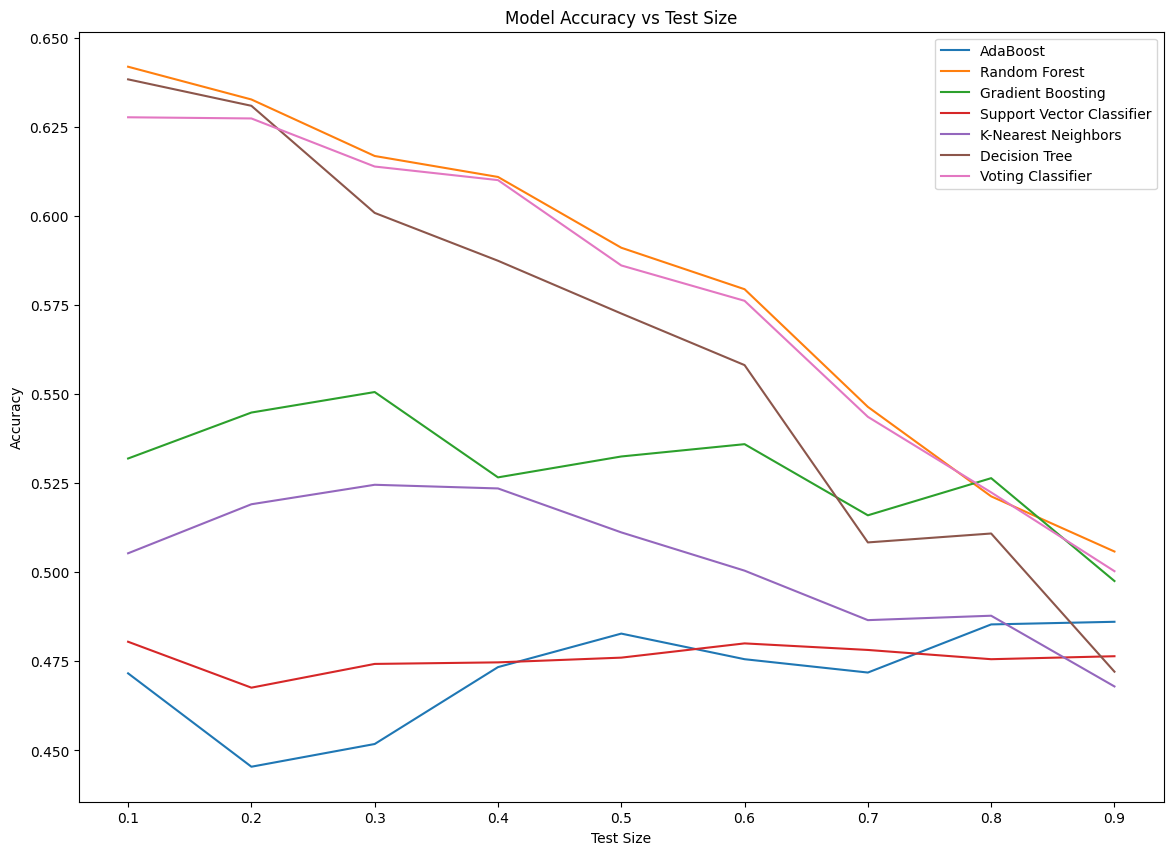

In [7]:
model_accuracies = {model_name: [] for model_name in models.keys()}

for test_size in test_sizes:
    for model_name, model in models.items():
        epoch_acci = []

        for epoch in range(EPOCHS):
            train_set, test_set = train_test_split(train_df, test_size=test_size, random_state=42)
            imputer = SimpleImputer(strategy='median')

            # 'eye_category', 'eye_position', 'gaze_direction', 'heart_rates', 'p2p_intervals', 'sys_peaks', 'dys_peaks'
            X_train = imputer.fit_transform(train_set[['heart_rates', 'p2p_intervals', 'sys_peaks', 'dys_peaks']])
            X_test = imputer.transform(test_set[['heart_rates', 'p2p_intervals', 'sys_peaks', 'dys_peaks']])

            y_train = train_set['engagement_labels']
            y_test = test_set['engagement_labels']

            model.fit(X_train, y_train)
            model_predictions = model.predict(X_test)
            accuracy = accuracy_score(y_test, model_predictions)

            epoch_acci.append(accuracy)

            if test_size == 0.2:
                print(f'{model_name} Epoch {epoch + 1}: {accuracy:.4f}')

        model_accuracies[model_name].append(sum(epoch_acci) / len(epoch_acci))

plt.figure(figsize=(14, 10))
for model_name, accuracies in model_accuracies.items():
    plt.plot(test_sizes, accuracies, label=model_name)

plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy vs Test Size')
plt.show();